# Scatterplots of active region statistics: Cycle 23

### Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
from scipy import stats
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_threecycles_decay.dat',dtype=np.float32)
A = A.reshape(951,164)

N = np.fromfile('npole_correct.dat',dtype=np.float32)
N = N.reshape(951,164)

S = np.fromfile('spole_correct.dat',dtype=np.float32)
S = S.reshape(951,164)

axdipole2 = np.fromfile('axdipole2_threecycles_decay.dat',dtype=np.float32)
realaxdipole = np.fromfile('realaxdipole.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(951):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    index_npole = np.nonzero(A[i,:]);
    start_npole.append(index_npole[0][0]);
    begin_npole.append(N[i,start_npole[i]]);
    index_spole = np.nonzero(S[i,:]);
    start_spole.append(index_spole[0][0]);
    begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
start_npole = np.asarray(start_npole)
start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
begin_npole = np.asarray(begin_npole)
begin_spole = np.asarray(begin_spole)

final = A[:,163]
final[0] = 1e-7
begin[0] = 1e-7
begin_rel = begin/(axdipole2[163]-axdipole2[0])
final_rel = final/(axdipole2[163]-axdipole2[0])
final_npole = N[:,163]
final_spole = S[:,163]

total = []
total_npole = []
total_spole = []
for i in range(164):
    total.append(sum(A[:,i]))
    total_npole.append(sum(N[:,i]))
    total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
reg_percent_npole = strong_npole.size/951*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
reg_percent_spole = strong_spole.size/951*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_threecycles_decay.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_threecycles_decay.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_threecycles_decay.dat',dtype=np.float32)
angle = np.fromfile('angle_collect.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(angle),(begin),(begin_rel),(final)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

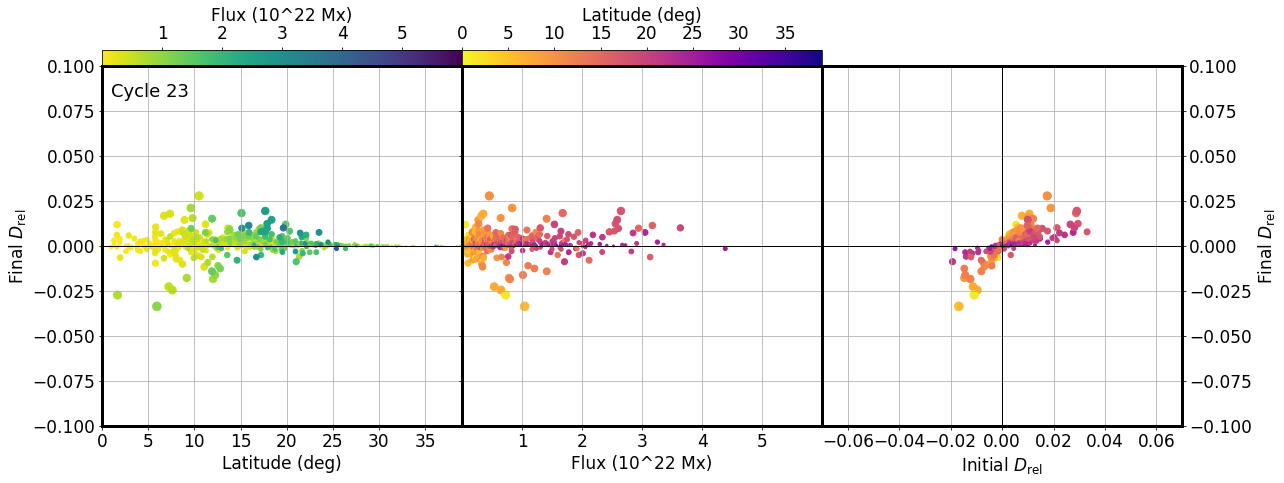

In [40]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)
orange = (255/255,161/255,0)
pink = (255/255,105/255,180/255)
plum = (238/255,174/255,238/255)

dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
plt.plot((lat1,lat2), (0, 0), 'k-',lw=1)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Final $D_{\mathrm{rel}}$')
ax1.grid()
ax1.set_xticks(latticks)
ax1.text(1, 0.083, 'Cycle 23', fontsize=18)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
ax2.set_xlim(fl1,fl2)
plt.plot((fl1,fl2), (0, 0), 'k-',lw=1)
ax2.set_ylim(-0.1,0.1)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft='off') 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Initial $D_{\mathrm{rel}}$')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.07,0.07)
plt.plot((-0.07,0.07), (0, 0), 'k-',lw=1)
plt.axvline(x=0,color='black',lw=1)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Final $D_{\mathrm{rel}}$')

# Setting Vertical Axis
ax1.set_ylim(-0.1,0.1)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_3panel_label.eps', format='eps', dpi=300,bbox_inches='tight')


2.39664162987 -0.000253275259661 0.989241438473 1.0751980895e-36 0.0546886252126


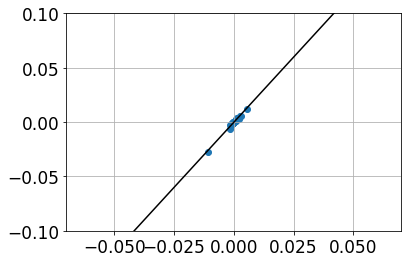

1.61186485515 -0.000351356536766 0.968496395465 7.85852599709e-89 0.0345379699138


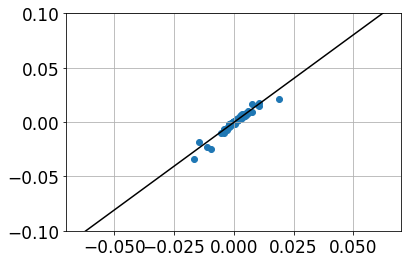

1.10997484478 -0.000219061764655 0.944566642885 1.65100297771e-104 0.0264977871841


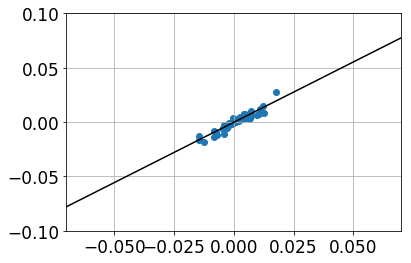

0.470266304353 1.83878233319e-05 0.88677902687 2.0540791204e-83 0.0157235017541


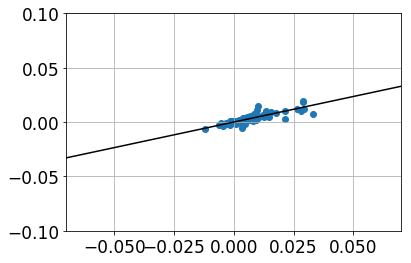

0.267517403459 -0.000155968374079 0.914912169904 4.32647023213e-68 0.00910596861206


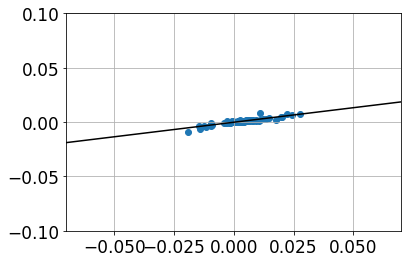

0.0792010504574 -2.87624853682e-05 0.842667033654 9.6477187945e-27 0.00524767296488


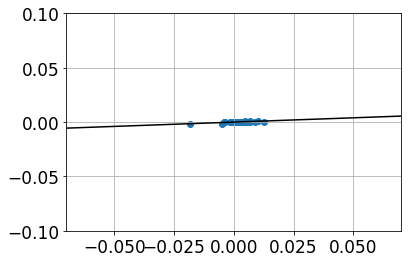

0.0340176199119 -8.86701649029e-06 0.957646521917 1.77046999168e-14 0.00208787621402


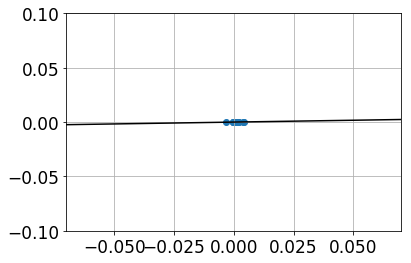

0.00810181674269 -1.47986910762e-06 0.950855855942 7.0500825353e-06 0.000879417196643


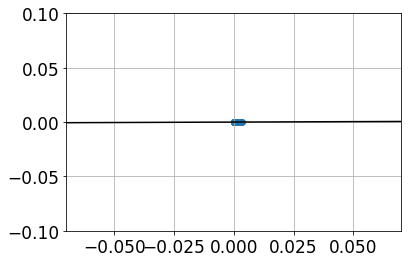

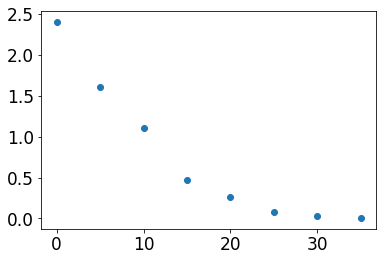

In [25]:
slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
initials = np.linspace(-0.07,0.07,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)>=35],final_rel[np.abs(reg_lat)>=35])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.07,0.07)
plt.ylim(-0.1,0.1)
plt.grid()
plt.show()

slopes = np.array([2.397,1.612,1.110,0.470,0.268,0.079,0.034,0.008])
ranges = np.arange(0,40,5)
plt.scatter(ranges,slopes)
plt.show()

[   2.09789236  252.08899648]


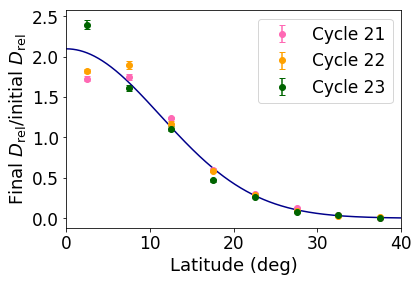

In [43]:
slopes21 = np.array([1.728,1.748,1.244,0.595,0.295,0.127,0.043,0.008])
slopes22 = np.array([1.825,1.897,1.168,0.581,0.287,0.092,0.025,0.011])
slopes23 = np.array([2.397,1.612,1.110,0.470,0.268,0.079,0.034,0.008])
ranges = np.arange(2.5,42.5,5)
plt.errorbar(ranges,slopes21,yerr=(0.032,0.035,0.012,0.024,0.008,0.005,0.008,0.001),color=pink,fmt='o',label='Cycle 21',capsize=3)
plt.errorbar(ranges,slopes22,yerr=(0.026,0.045,0.040,0.013,0.021,0.004,0.001,0.002),color=orange,fmt='o',label='Cycle 22',capsize=3)
plt.errorbar(ranges,slopes23,yerr=(0.055,0.035,0.026,0.016,0.009,0.005,0.002,0.001),color='darkgreen',fmt='o',label='Cycle 23',capsize=3)
plt.xlabel('Latitude (deg)',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$/initial $D_{\mathrm{rel}}$',fontsize=18)
plt.xlim([0,40])
plt.legend()


def gaussian(x, amp, wid):
    return amp*np.exp(-(x**2)/wid)

from scipy.optimize import curve_fit

x = np.array([2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5])
x2 = np.linspace(0,40,1001)
y = np.array([1.728,1.748,1.244,0.595,0.295,0.127,0.043,0.008,1.825,1.897,1.168,0.581,0.287,0.092,0.025,0.011,2.397,1.612,1.110,0.470,0.268,0.079,0.034,0.008])
init_vals = [2, 110]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
fit1 = gaussian(x2,best_vals[0],best_vals[1])

plt.plot(x2,fit1,'darkblue')

print(best_vals)


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/ratio_scatter.eps', format='eps', dpi=300,bbox_inches='tight')

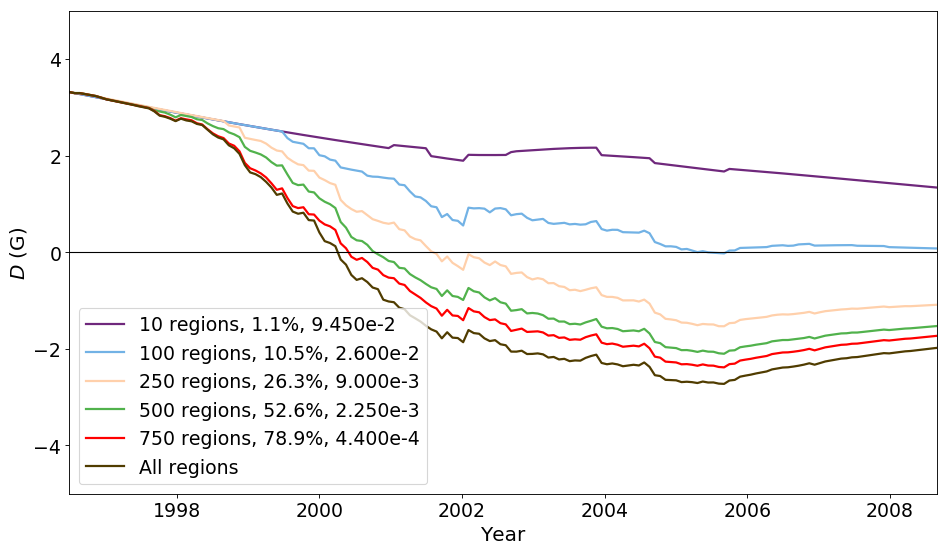

In [5]:
timeyear = (np.arange(1,165)*27.27+152)/365.25+1996

axdipole_10 = np.fromfile('axdipole_10_threecycles_decay.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_threecycles_decay.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_threecycles_decay.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_threecycles_decay.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_threecycles_decay.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_10,color=purple,lw=2,label='10 regions, 1.1%, 9.450e-2')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 10.5%, 2.600e-2')
plt.plot(timeyear,axdipole_250,color=peach,lw=2,label='250 regions, 26.3%, 9.000e-3')
plt.plot(timeyear,axdipole_500,color=green,lw=2,label='500 regions, 52.6%, 2.250e-3')
plt.plot(timeyear,axdipole_750,'red',lw=2,label='750 regions, 78.9%, 4.400e-4')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-5,5)
plt.xlabel('Year',fontsize=18)
plt.ylabel('$D$ (G)',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_5profiles_threecycles_decay.eps', format='eps', dpi=300,bbox_inches='tight')

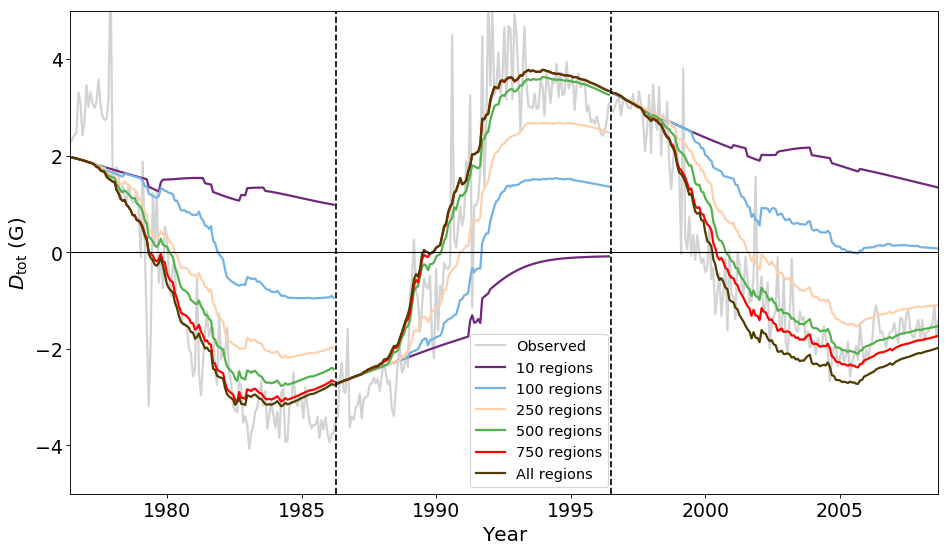

In [6]:
timeyear_c21 = (np.arange(1,133)*27.27+121)/365.25+1976
timeyear_c22 = (np.arange(1,138)*27.27+68)/365.25+1986
timeyear = (np.arange(1,165)*27.27+152)/365.25+1996
timeyear_full = np.concatenate([timeyear_c21,timeyear_c22,timeyear])

axdipole2_c21 = np.fromfile('axdipole2_c21_threecycles_decay.dat',dtype=np.float32)

axdipole_10_c21 = np.fromfile('axdipole_10_c21_threecycles_decay.dat',dtype=np.float32)
axdipole_100_c21 = np.fromfile('axdipole_100_c21_threecycles_decay.dat',dtype=np.float32)
axdipole_250_c21 = np.fromfile('axdipole_250_c21_threecycles_decay.dat',dtype=np.float32)
axdipole_500_c21 = np.fromfile('axdipole_500_c21_threecycles_decay.dat',dtype=np.float32)
axdipole_750_c21 = np.fromfile('axdipole_750_c21_threecycles_decay.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear_full,realaxdipole,color='lightgrey',lw=2,label='Observed')
plt.plot(timeyear_c21,axdipole_10_c21,color=purple,lw=2,label='10 regions')
plt.plot(timeyear_c21,axdipole_100_c21,color=blue,lw=2,label='100 regions')
plt.plot(timeyear_c21,axdipole_250_c21,color=peach,lw=2,label='250 regions')
plt.plot(timeyear_c21,axdipole_500_c21,color=green,lw=2,label='500 regions')
plt.plot(timeyear_c21,axdipole_750_c21,'red',lw=2,label='750 regions')
plt.plot(timeyear_c21,axdipole2_c21,color=brown,lw=2,label='All regions')

axdipole2_c22 = np.fromfile('axdipole2_c22_threecycles_decay.dat',dtype=np.float32)

axdipole_10_c22 = np.fromfile('axdipole_10_c22_threecycles_decay.dat',dtype=np.float32)
axdipole_100_c22 = np.fromfile('axdipole_100_c22_threecycles_decay.dat',dtype=np.float32)
axdipole_250_c22 = np.fromfile('axdipole_250_c22_threecycles_decay.dat',dtype=np.float32)
axdipole_500_c22 = np.fromfile('axdipole_500_c22_threecycles_decay.dat',dtype=np.float32)
axdipole_750_c22 = np.fromfile('axdipole_750_c22_threecycles_decay.dat',dtype=np.float32)

plt.plot(timeyear_c22,axdipole_10_c22,color=purple,lw=2)
plt.plot(timeyear_c22,axdipole_100_c22,color=blue,lw=2)
plt.plot(timeyear_c22,axdipole_250_c22,color=peach,lw=2)
plt.plot(timeyear_c22,axdipole_500_c22,color=green,lw=2)
plt.plot(timeyear_c22,axdipole_750_c22,'red',lw=2)
plt.plot(timeyear_c22,axdipole2_c22,color=brown,lw=2)

axdipole_10 = np.fromfile('axdipole_10_threecycles_decay.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_threecycles_decay.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_threecycles_decay.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_threecycles_decay.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_threecycles_decay.dat',dtype=np.float32)

plt.plot(timeyear,axdipole_10,color=purple,lw=2)
plt.plot(timeyear,axdipole_100,color=blue,lw=2)
plt.plot(timeyear,axdipole_250,color=peach,lw=2)
plt.plot(timeyear,axdipole_500,color=green,lw=2)
plt.plot(timeyear,axdipole_750,'red',lw=2)
plt.plot(timeyear,axdipole2,color=brown,lw=2)
plt.axvline(x=timeyear_c22[0],color='black',linestyle='--')
plt.axvline(x=timeyear[0],color='black',linestyle='--')
plt.plot((timeyear_c21[0],timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear_c21[0],timeyear[163])
plt.ylim(-5,5)
plt.xlabel('Year',fontsize=18)
plt.ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
plt.legend(fontsize=13,bbox_to_anchor=(0.04, 0., 1., .102),loc=8)
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/5profiles_obs.eps', format='eps', dpi=300,bbox_inches='tight')

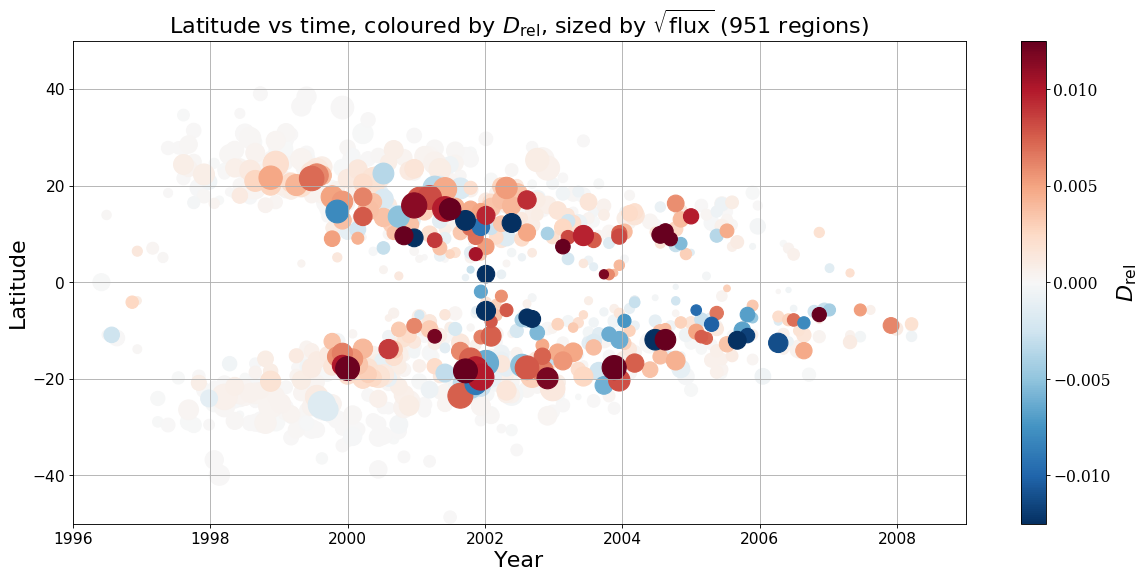

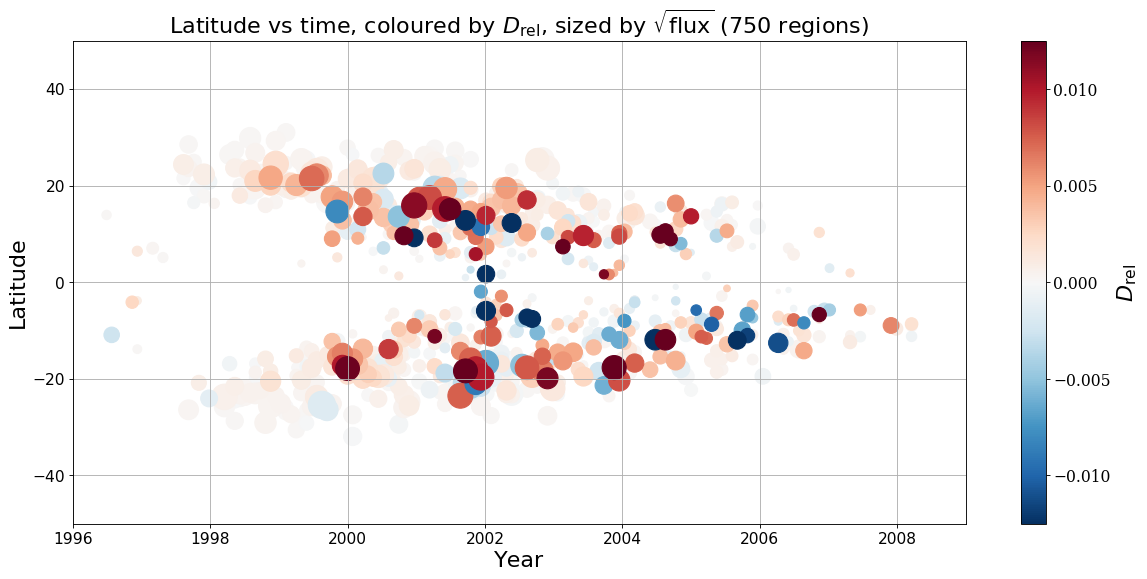

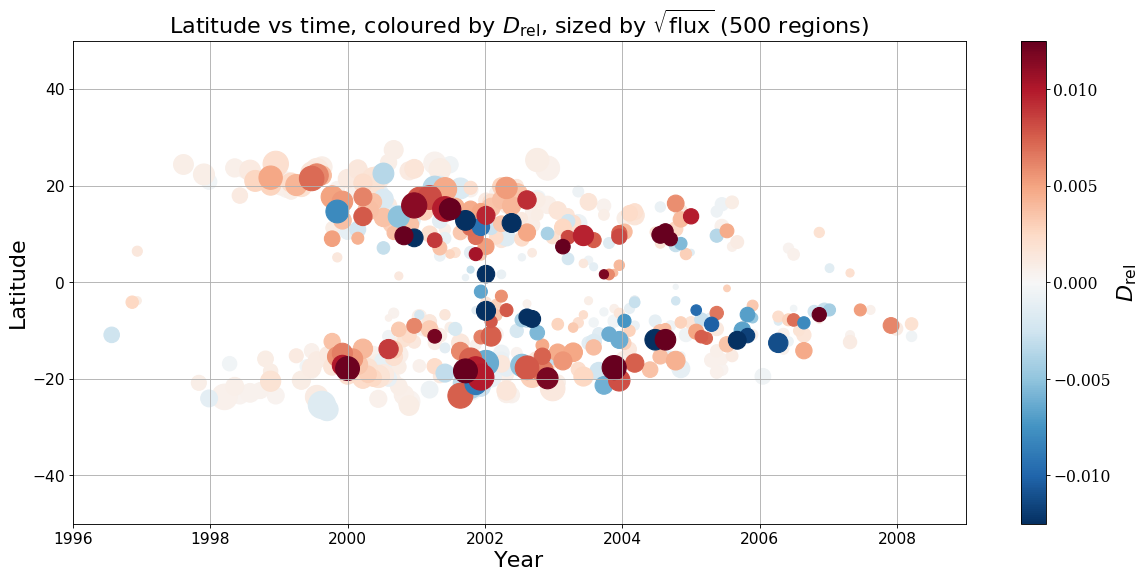

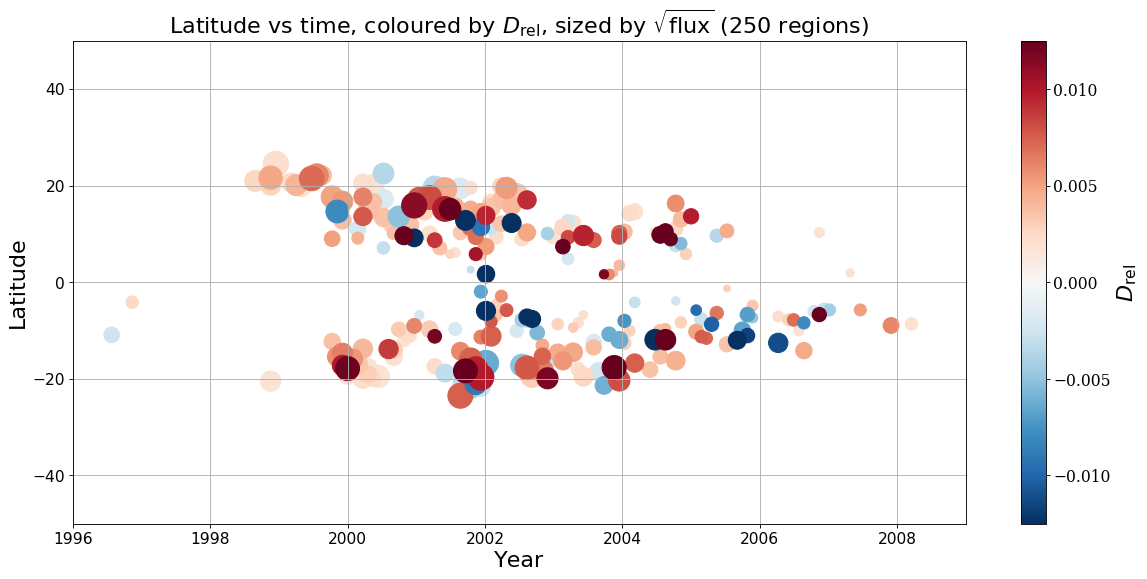

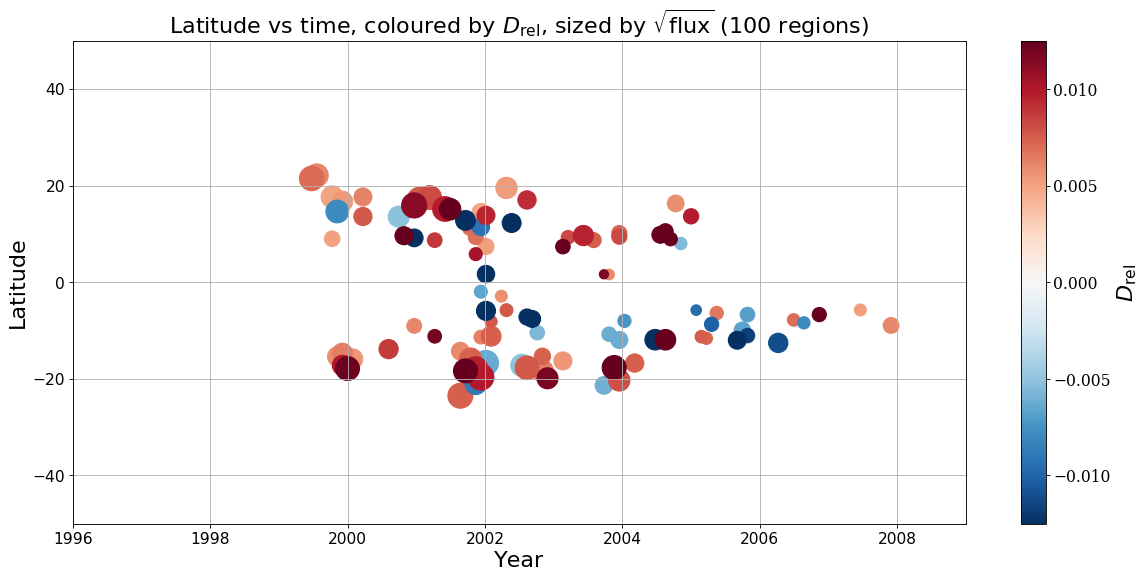

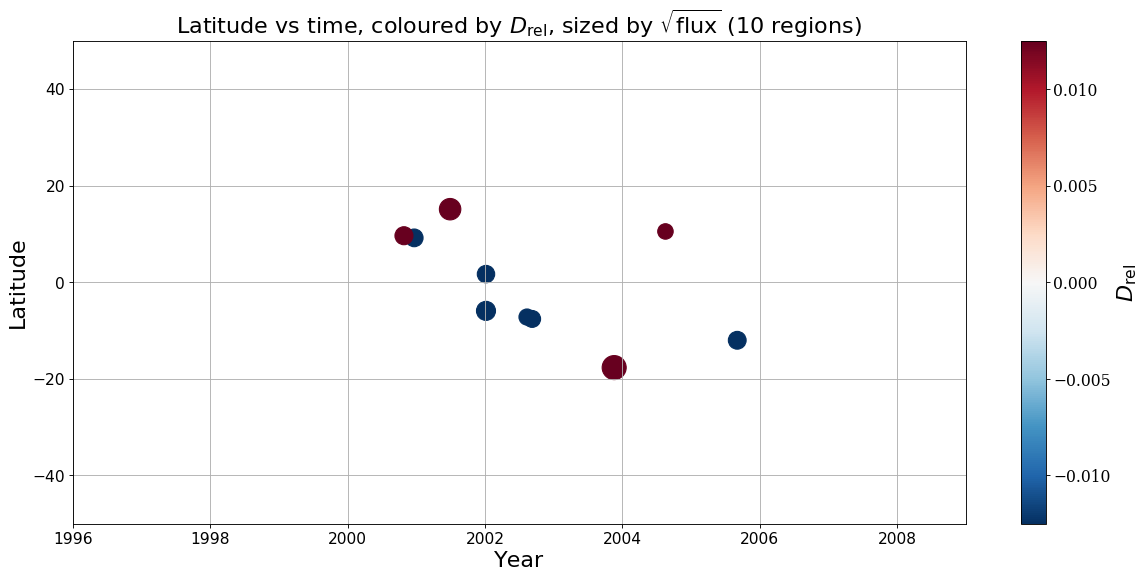

In [37]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+152)/365.25+1996,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (951 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 4.4e-4;
strong2 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong2.size/951*100;
#print(strong2.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong2]*27.27+152)/365.25+1996,b[2][strong2],200*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (750 regions)',fontsize=20)
plt.grid()
plt.show()

        
thresh = 2.25e-3;
strong3 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong3.size/951*100;
#print(strong3.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong3]*27.27+152)/365.25+1996,b[2][strong3],200*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (500 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 9e-3;
strong4 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong4.size/951*100;
#print(strong4.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong4]*27.27+152)/365.25+1996,b[2][strong4],200*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (250 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 2.6e-2;
strong5 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong5.size/951*100;
#print(strong5.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong5]*27.27+152)/365.25+1996,b[2][strong5],200*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (100 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 9.45e-2;
strong6 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong6.size/951*100;
#print(strong6.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong6]*27.27+152)/365.25+1996,b[2][strong6],200*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
cb_label = '$D_{\mathrm{rel}}$'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by $D_{\mathrm{rel}}$, sized by $\sqrt{\mathrm{flux}}$ (10 regions)',fontsize=20)
plt.grid()
plt.show()

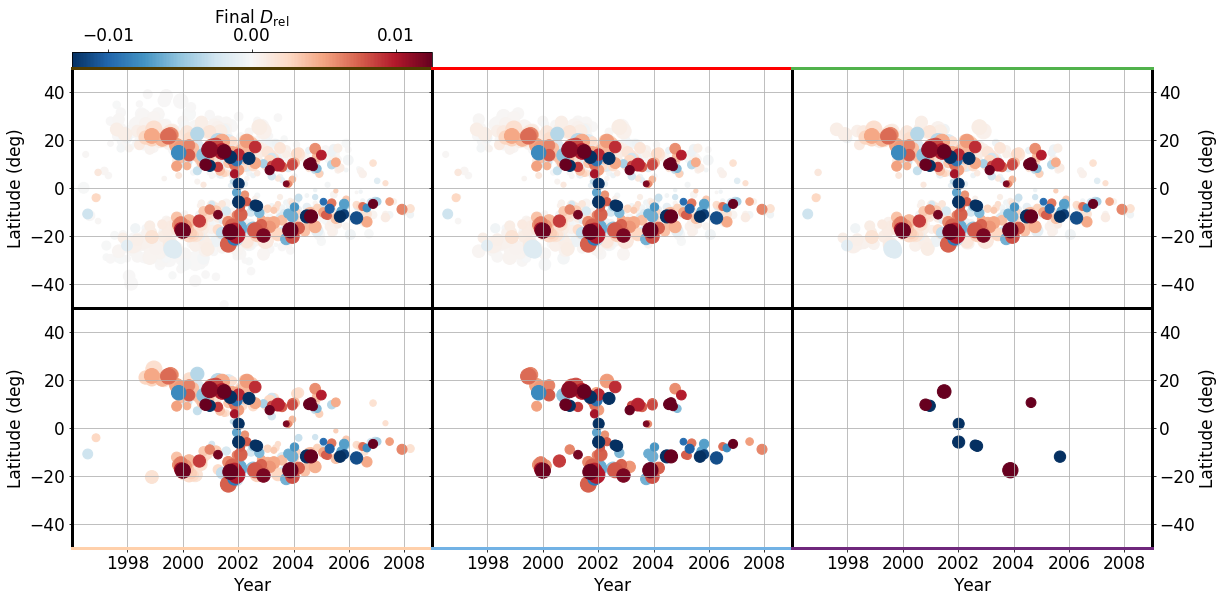

In [36]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1000    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))


yearticks = np.arange(1998,2010,2)
radmticks = np.arange(-0.02,0.03,0.01)


#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Panel 1
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter((b[3]*27.27+152)/365.25+1996,b[2],100*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax1.set_xlabel('Year')
ax1.set_xlim(1996,2009)
ax1.set_ylabel('Latitude (deg)')
ax1.tick_params(labelbottom='off')
ax1.grid()

# Panel 2
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im2 = ax2.scatter((b[3][strong2]*27.27+152)/365.25+1996,b[2][strong2],100*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax2.set_xlabel('Year')
ax2.set_xlim(1996,2009)
ax2.set_ylim(-50,50)
ax2.grid()
ax2.tick_params(labelleft='off')
ax2.tick_params(labelbottom='off')


# Panel 3
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im3 = ax3.scatter((b[3][strong3]*27.27+152)/365.25+1996,b[2][strong3],100*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Latitude (deg)')
ax3.tick_params(labelbottom='off')


ax1.set_ylim(-50,50)


# Panel 4
ax4 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
im4 = ax4.scatter((b[3][strong4]*27.27+152)/365.25+1996,b[2][strong4],100*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax4.set_xlabel('Year')
ax4.set_xlim(1996,2009)
ax4.set_ylabel('Latitude (deg)')
ax4.grid()
ax4.set_xticks(yearticks)
#ax4.text(0, 0, '250 regions', fontsize=18)

# Panel 5
ax5 = fig.add_axes([ppadh+pxx/fszh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax2)
im5 = ax5.scatter((b[3][strong5]*27.27+152)/365.25+1996,b[2][strong5],100*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax5.set_xlabel('Year')
ax5.set_xlim(1996,2009)
ax5.grid()
ax5.tick_params(labelleft='off') 
ax5.set_xticks(yearticks)

# Panel 6
ax6 = fig.add_axes([ppadh+pxx/fszh*2, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax3)
im6 = ax6.scatter((b[3][strong6]*27.27+152)/365.25+1996,b[2][strong6],100*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.0125,vmax=0.0125)
ax6.set_xlabel('Year')
ax6.set_xlim(1996,2009)
ax6.grid()
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('Latitude (deg)')
ax6.set_xticks(yearticks)



ax4.set_ylim(-50,50)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Final $D_{\mathrm{rel}}$')
cb1.set_ticks(radmticks)
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax1.spines['top'].set_color(brown)

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)
ax2.spines['top'].set_color('red')

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)
ax3.spines['top'].set_color(green)

ax4.spines['bottom'].set_linewidth(3) 
ax4.spines['top'].set_linewidth(3)  
ax4.spines['right'].set_linewidth(3) 
ax4.spines['left'].set_linewidth(3)
ax4.spines['bottom'].set_color(peach)

ax5.spines['bottom'].set_linewidth(3) 
ax5.spines['top'].set_linewidth(3)  
ax5.spines['right'].set_linewidth(3) 
ax5.spines['left'].set_linewidth(3)
ax5.spines['bottom'].set_color(blue)

ax6.spines['bottom'].set_linewidth(3) 
ax6.spines['top'].set_linewidth(3)  
ax6.spines['right'].set_linewidth(3) 
ax6.spines['left'].set_linewidth(3)
ax6.spines['bottom'].set_color(purple)


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c23_6panel.eps', format='eps', dpi=300,bbox_inches='tight')

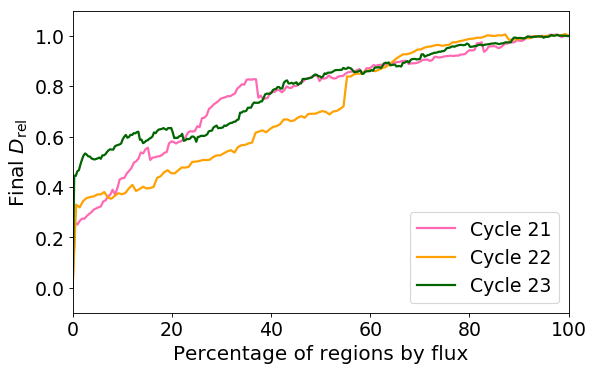

In [34]:
axd_fluxpercent = np.fromfile('axcollect_fluxpercent_threecycles_decay.dat',dtype=np.float32)
axd_fluxpercent_c22 = np.fromfile('axcollect_fluxpercent_c22_threecycles_decay.dat',dtype=np.float32)
axd_fluxpercent_c21 = np.fromfile('axcollect_fluxpercent_c21_threecycles_decay.dat',dtype=np.float32)
axd_fluxpercent = np.insert(axd_fluxpercent,0,0)
axd_fluxpercent_c22 = np.insert(axd_fluxpercent_c22,0,0)
axd_fluxpercent_c21 = np.insert(axd_fluxpercent_c21,0,0)

fig7 = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,845,4)*100/844,axd_fluxpercent_c21,color=pink,lw=2,label='Cycle 21')
plt.plot(np.arange(0,847,6)*100/846,axd_fluxpercent_c22,color=orange,lw=2,label='Cycle 22')
plt.plot(np.arange(0,952,3)*100/951,axd_fluxpercent,color='darkgreen',lw=2,label='Cycle 23')
plt.xlim(0,100)
plt.ylim(-0.1,1.1)
plt.xlabel('Percentage of regions by flux',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/reg_percent_threecycles_decay.eps', format='eps', dpi=300,bbox_inches='tight')
